# Using Pandas

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Vegetable.csv')

In [3]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [4]:
x = df['Weight']
y = df['Price']

In [5]:
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [6]:
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

# Least Square method

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [8]:
mean_x

4.571428571428571

In [9]:
mean_y

47.142857142857146

# Deviation

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x

In [11]:
dev_x = x - mean_x 
dev_y = y - mean_y

In [12]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [13]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

# Slope

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)

In [16]:
print(f"Slope is (M): {m}")

Slope is (M): 2.620967741935484


In [17]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


# Y- intercept or C

In [18]:
c = mean_y - (m * mean_x)

In [20]:
print("Intecept of Y is (C): ", c)

Intecept of Y is (C):  35.16129032258065


In [23]:
m

2.620967741935484

In [28]:
# now we can precit a value by giving vegetable weight

new_x = float(input("Enter vegetable weight: "))

pred1 = m * new_x + c

print("Price of vegetable is: ", pred1)

Enter vegetable weight: 6
Price of vegetable is:  50.88709677419355


# Residual

Residual = Actual_value - Predicated_value

In [29]:
residual = 50.88709677419355 - 50
residual

0.8870967741935516

# Using Sklearn

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [105]:
reg.fit(df[['Weight']], df[['Price']])

LinearRegression()

In [106]:
reg.coef_ # coef_ is a key word to get the coefficient 

array([[2.62096774]])

In [107]:
reg.intercept_ # intercept is a key word to get the Y-intercept or c value 

array([35.16129032])

In [108]:
reg.predict([[4]])

array([[45.64516129]])

In [109]:
pred1

50.88709677419355

# Plot Scatter

Text(0.5, 1.0, 'Vegetable-Price Visualization')

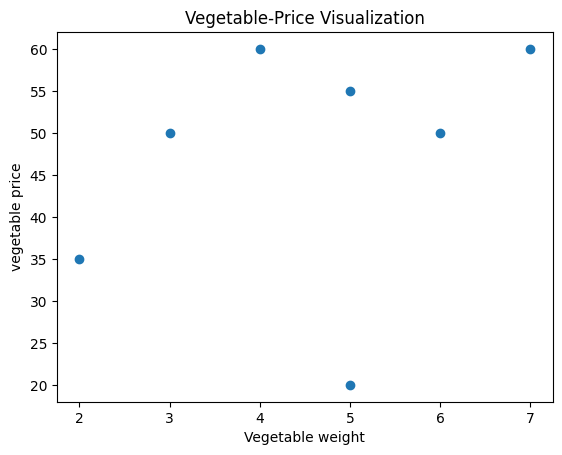

In [110]:
plt.scatter(x, y)
plt.xlabel("Vegetable weight")
plt.ylabel("vegetable price")
plt.title("Vegetable-Price Visualization")

In [111]:
df['Predicted_value']= reg.predict(df[['Weight']]) # adding Predicted_value column 

In [125]:
df

,Weight,Price,Predicted_value
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [126]:
#Residual= df['Price'] - df['Predicted_value']

In [127]:
df['residual'] = df['Price'] - df['Predicted_value'] # this column returns Residual value

In [128]:
df

,Weight,Price,Predicted_value,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


# MAE & MSE

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [130]:
mse = mean_squared_error(df['Price'], reg.predict(df[['Weight']])) # to get MSE

In [131]:
mse

167.30990783410135

In [132]:
mae = mean_absolute_error(df['Price'], reg.predict(df[['Weight']])) # to get MAE

In [133]:
mae

9.87327188940092

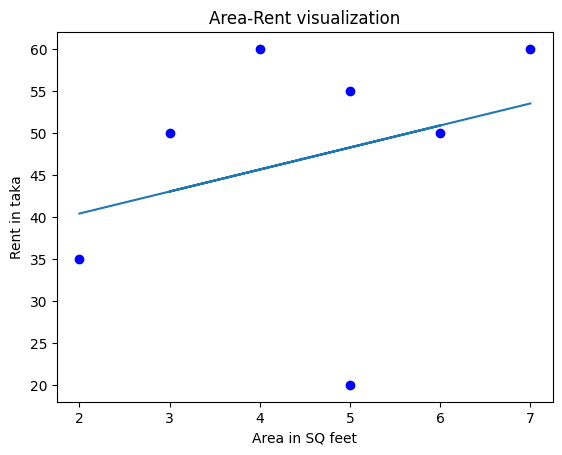

In [134]:
plt.scatter(df["Weight"], df["Price"], color='blue') # to see the 2D plot 
plt.xlabel("Area in SQ feet")
plt.ylabel("Rent in taka")
plt.title("Area-Rent visualization")
plt.plot(df['Weight'], reg.predict(df[['Weight']]))

In [135]:
df

,Weight,Price,Predicted_value,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [137]:
df.to_csv("Vegetable_Price_prediction.csv") # creating a csv Dataset